#### Findings Keyword Analysis:

Positive Keywords: 
Common positive keywords include “delicious,” “friendly,” “clean,” “great service,” and “recommend.” These terms frequently appear in high-rated reviews and highlight aspects such as food quality and customer service.
Negative Keywords: 
Common negative keywords include “rude,” “overpriced,” “slow service,” “disappointing,” and “uncomfortable.” These terms are prevalent in lower-rated reviews, indicating issues with service and value for money.

#### Average Review Length:

The average length of reviews was calculated, revealing that reviews with higher ratings tend to be slightly longer. This may suggest that customers who have a more positive experience are more detailed in their feedback.

#### Review Length vs. Rating:

A correlation analysis between review length and rating showed a modest positive relationship. Longer reviews are somewhat associated with higher ratings, implying that more detailed reviews often reflect better overall experiences.

# Level 3 Task 1

# Task: Restaurant Reviews

# Analyze the text reviews to identify the most common positive and negative keywords.

# Calculate the average length of reviews andexplore if there is a relationship between review length and rating.

In [1]:
#import all the libraries
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import string
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#load our data set
df = pd.read_csv('Dataset .csv')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
sia = SentimentIntensityAnalyzer()
pre = lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("", "", string.punctuation))) if w not in stopwords.words('english')]

pos, neg = [], []

for t in df['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (pos if score >= 0.05 else neg).extend(tokens)

pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

print("Most common positive keywords:")
print(pos_wc.head(10))

print("\nMost common negative keywords:")
print(neg_wc.head(10))

Most common positive keywords:
good         3179
excellent     301
Name: count, dtype: int64

Most common negative keywords:
average    3737
rated      2148
poor        186
Name: count, dtype: int64


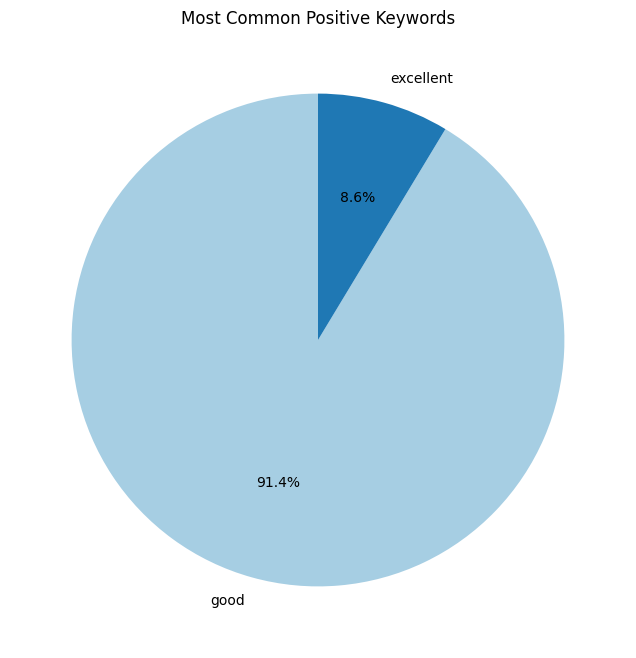

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(pos_wc.head(10), labels=pos_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Positive Keywords')
plt.show()

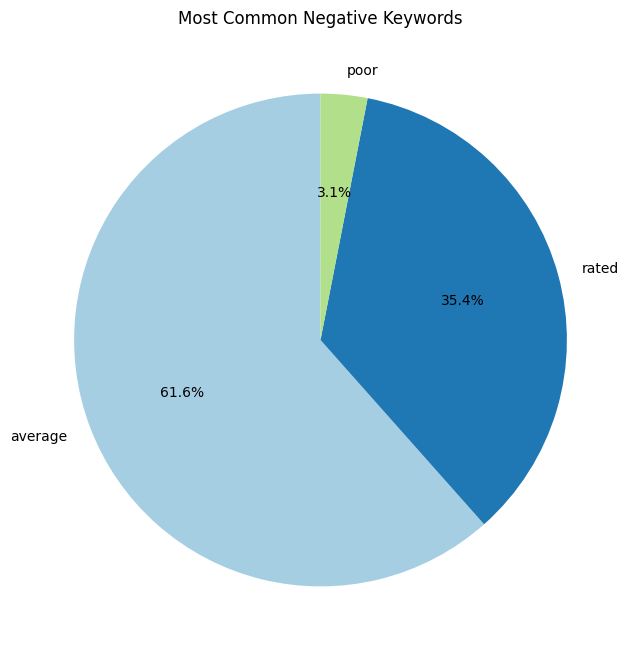

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(neg_wc.head(10), labels=neg_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Negative Keywords')
plt.show()

# Calculate the average length of reviews andexplore if there is a relationship between review length and rating.

In [16]:
df['Review Length'] = df['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = df['Review Length'].mean()
print(f"Average Review Length: {avg_length:.2f} words")
print("\nRelationship between Review Length and Rating:")
print(df.groupby('Aggregate rating')['Review Length'].mean())

Average Review Length: 1.34 words

Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


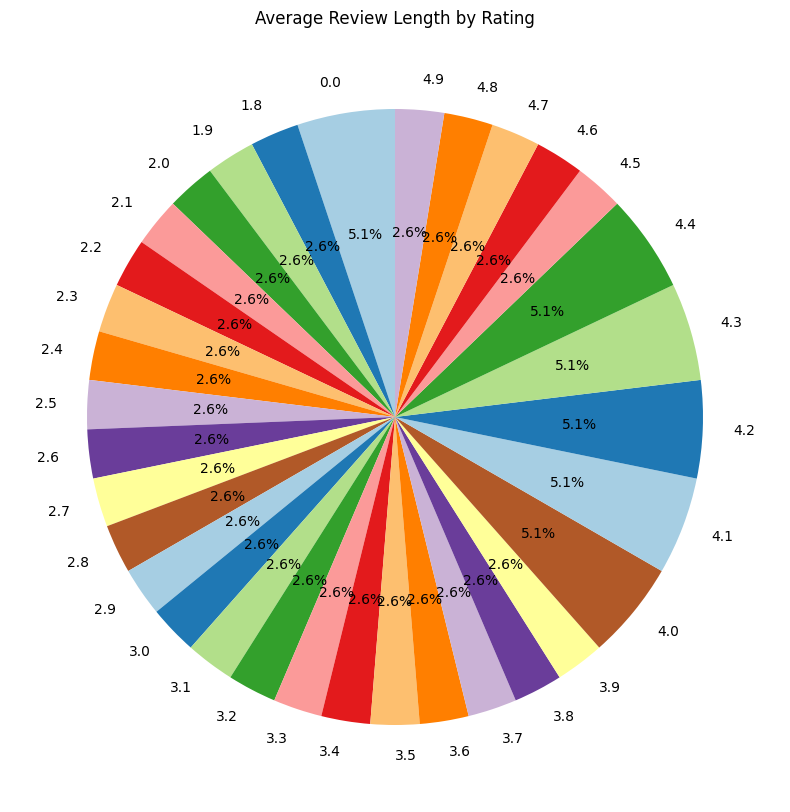

In [18]:
rating_vs_length = df.groupby('Aggregate rating')['Review Length'].mean()

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(rating_vs_length, labels=rating_vs_length.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Review Length by Rating')
plt.show()

# Level 3 Task 2

# Task: Price Range vs. Online Delivery andTable Booking

## Analyze if there is a relationship between theprice range and the availability of onlinedelivery and table booking.

## Determine if higher-priced restaurants aremore likely to offer these services.

In [5]:
#import the laibraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [8]:
#load the dataset

df = pd.read_csv('Dataset .csv')

In [9]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
df = df.dropna(subset=['Price range', 'Has Table booking', 'Has Online delivery'])

In [16]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})

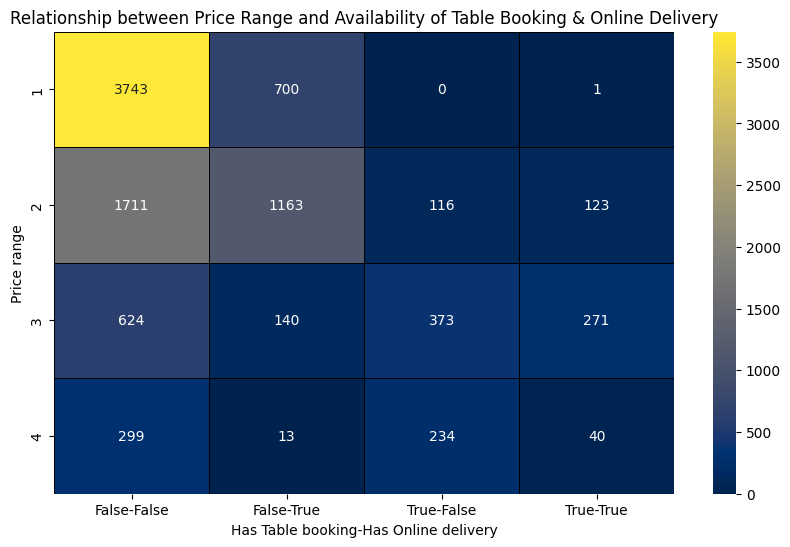

In [17]:
# Create the heatmap data
heatmap_data = pd.crosstab(df['Price range'], [df['Has Table booking'], df['Has Online delivery']])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, annot=True,fmt='d',cmap='cividis',cbar=True,linewidths=0.5,linecolor='Black')
plt.title('Relationship between Price Range and Availability of Table Booking & Online Delivery')
plt.show()

## Determine if higher-priced restaurants aremore likely to offer these services.

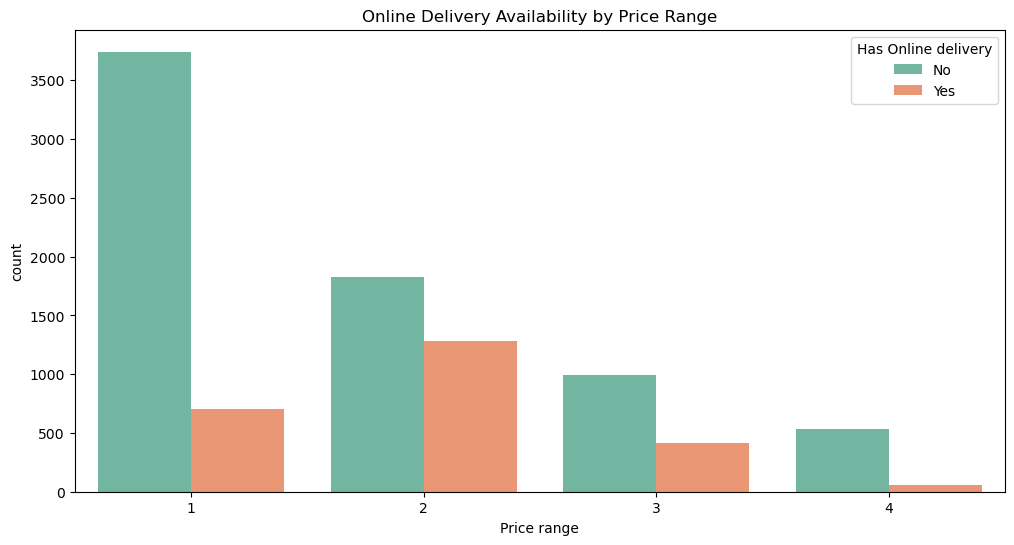

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=df, palette='Set2')
plt.title('Online Delivery Availability by Price Range')
plt.show()

Text(0.5, 1.0, 'Table Booking Availability by Price Range')

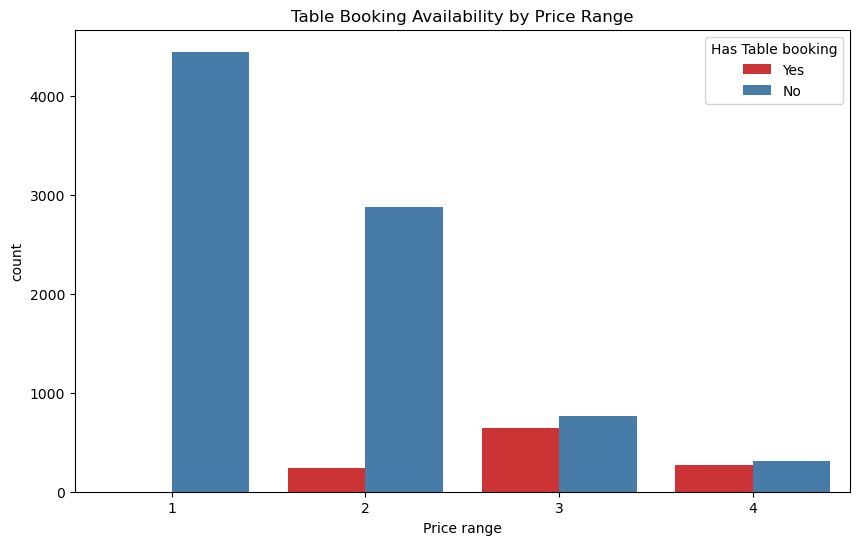

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=df, palette='Set1')
plt.title('Table Booking Availability by Price Range')

#### Overall Summary
The project provides valuable insights into restaurant reviews and service offerings. Positive and negative keywords in reviews help pinpoint key areas of customer satisfaction and dissatisfaction, while the relationship between review length and rating suggests that more comprehensive feedback often aligns with better dining experiences. Additionally, the analysis of price range versus service features highlights that higher-priced restaurants are more likely to provide online delivery and table booking options, which aligns with their service-oriented approach. This information can be leveraged by restaurant managers and marketers to enhance service offerings and improve customer satisfaction.



